In [1]:
import yfinance as yf
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Comparacion IBM y Walmart

In [3]:
ibm_walmart = yf.download(tickers = 'IBM, WMT', period = '5y', interval = '1mo', rounding = True)
ibm_walmart.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


Price       Close           High           Low          Open         \
Ticker        IBM    WMT     IBM    WMT    IBM    WMT    IBM    WMT   
Date                                                                  
2020-04-01  95.48  37.65   98.34  41.32  79.48  34.63  80.88  34.74   
2020-05-01  94.98  38.43   96.56  40.89  85.03  37.41  93.68  37.63   
2020-06-01  93.07  37.27  104.72  38.71  89.31  36.41  96.06  38.41   
2020-07-01  94.75  40.26  101.86  41.73  88.78  36.78  92.69  37.16   
2020-08-01  95.03  43.20  100.55  43.89  94.14  39.91  95.18  40.42   

Price          Volume             
Ticker            IBM        WMT  
Date                              
2020-04-01  136705925  621479400  
2020-05-01   97154572  560369100  
2020-06-01  126567676  557556600  
2020-07-01  119434686  592356300  
2020-08-01   77439042  690025200

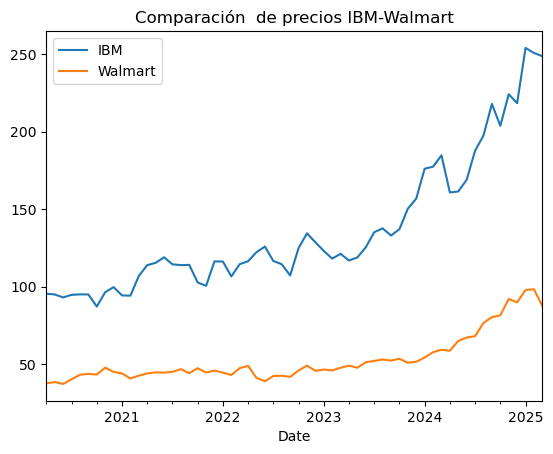

In [4]:
ibm_walmart = ibm_walmart['Close']
import matplotlib.pyplot as plt
ibm_walmart['IBM'].plot()
ibm_walmart['WMT'].plot()
plt.legend(['IBM', 'Walmart'])
plt.title('Comparación  de precios IBM-Walmart')
plt.show()

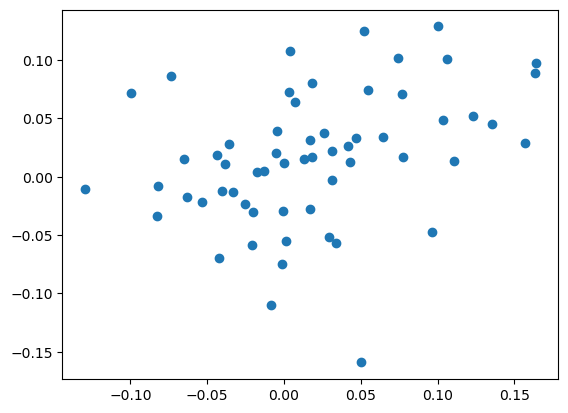

In [5]:
rend_ibm_walmart = ibm_walmart.pct_change()
rend_ibm_walmart = rend_ibm_walmart.dropna()
plt.scatter(rend_ibm_walmart['IBM'], rend_ibm_walmart['WMT'])
plt.show()

In [6]:
correlacion = rend_ibm_walmart['IBM'].corr(rend_ibm_walmart['WMT'])
print('Correlacion entre IBM y Walmart:', correlacion)

Correlacion entre IBM y Walmart: 0.3454879949436988


In [7]:
import statsmodels.api as sm
rend_ibm_walmart  = sm.add_constant(rend_ibm_walmart)
regresion = sm.OLS(rend_ibm_walmart["IBM"], rend_ibm_walmart[['const', 'WMT']]).fit()
print(regresion.summary())

                            OLS Regression Results                            
Dep. Variable:                    IBM   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     7.726
Date:                Tue, 01 Apr 2025   Prob (F-statistic):            0.00736
Time:                        20:17:57   Log-Likelihood:                 80.648
No. Observations:                  59   AIC:                            -157.3
Df Residuals:                      57   BIC:                            -153.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0121      0.008      1.424      0.1

# Predicciones IBM

In [9]:
ibm = yf.download(tickers = 'IBM', period = '5y', interval = '1d', rounding = True)
ibm = ibm['Close']
ibm.head()

[*********************100%***********************]  1 of 1 completed


Ticker,IBM
Date,
2020-04-02,83.65
2020-04-03,80.87
2020-04-06,87.32
2020-04-07,87.41
2020-04-08,90.72


In [10]:
# Calculo de indice de autocorrelation 
ibm_series = ibm.squeeze()  # Convierte un DataFrame con una sola columna en una Serie

# Calcular la autocorrelación
autocorrelacion = ibm_series.autocorr()
autocorrelacion

0.9986177428517229

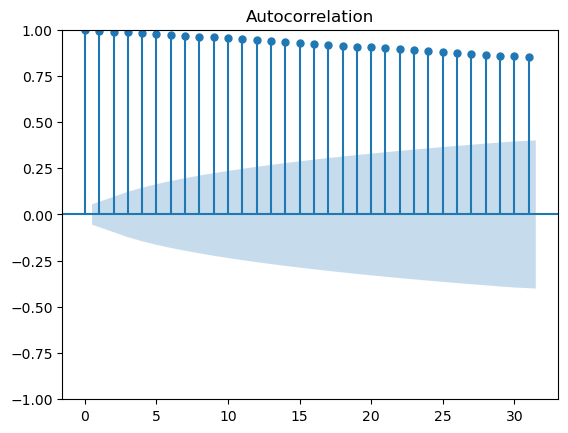

In [11]:
# Generaicon de la funcion de autocorrelacion
from statsmodels.tsa.stattools import  acf
from statsmodels.graphics.tsaplots import plot_acf

acf_array = acf(ibm)
plot_acf(ibm, alpha = 0.05)
plt.show() # si hay correlacion porque el area azul no sale de los puntos azules

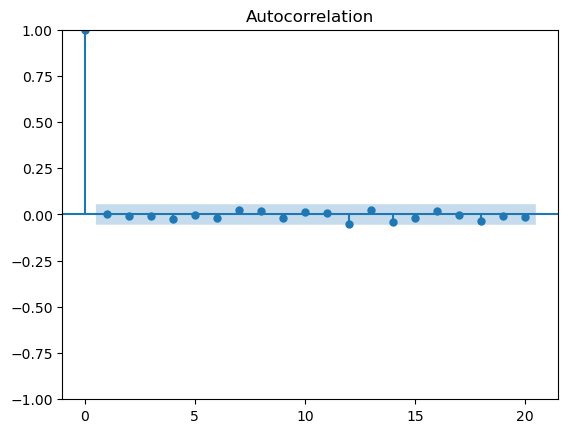

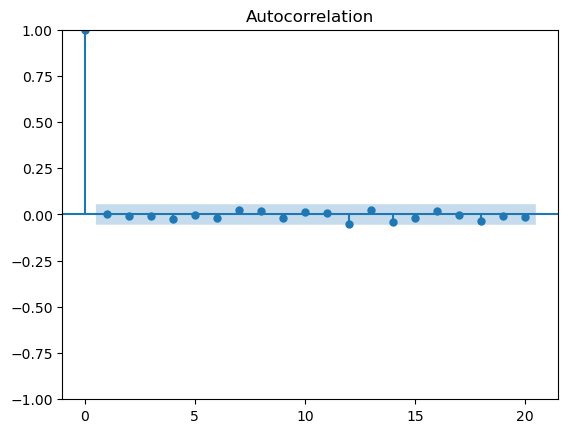

In [12]:
rendimientos = ibm.pct_change()
rendimientos = rendimientos.dropna()
acf_rend = acf(rendimientos)
plot_acf(rendimientos, alpha = 0.05 ,lags = 20)

In [13]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Prueba Dickey-Fuller para los precios de APPLE
resultado = adfuller(ibm)
print('El valor p de la prueba es: ' + str(resultado[1]))

El valor p de la prueba es: 0.9884776345981205


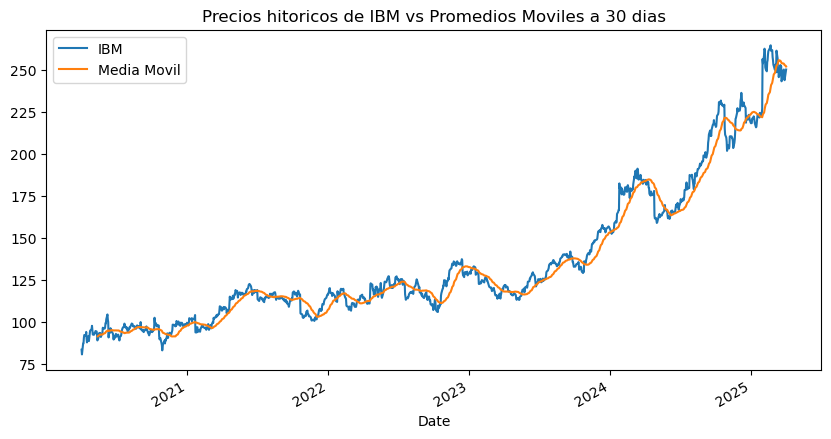

In [14]:
# Graficacion de la media movil para IBM
rolling_ibm = ibm.rolling(30).mean()

fig, ax = plt.subplots(figsize=(10, 5))
ibm.plot(ax=ax, label="IBM")
rolling_ibm.plot(ax=ax, label="Media Móvil")
plt.title("Precios hitoricos de IBM vs Promedios Moviles a 30 dias")
plt.legend(['IBM', 'Media Movil'])
plt.show()

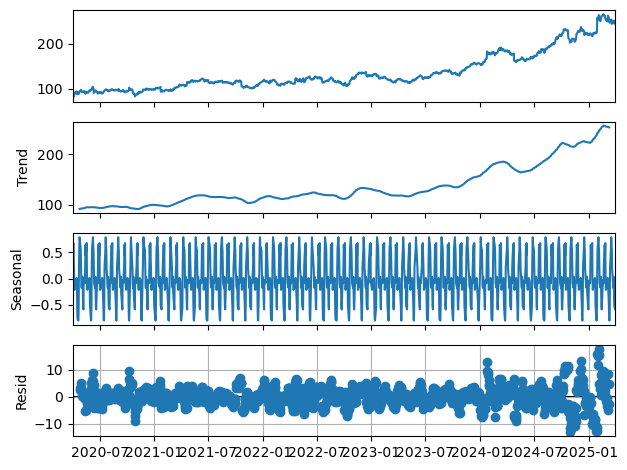

In [15]:
decomposed_ibm = sm.tsa.seasonal_decompose(ibm, period = 30)
figure = decomposed_ibm.plot()
plt.grid()
plt.show()

In [16]:
# Prediccion simple mediante promedios moviles
ibm.shape

(1256, 1)

In [17]:
len_train = int(1256 * 0.8)
len_train

1004

In [18]:
# Definition de grupos de entrenamiento y prueba
train = ibm[0:len_train]
test = ibm[len_train:]

y_pred = ibm.copy()
y_pred = pd.DataFrame(y_pred)
y_pred['pronostico'] = ibm.rolling(30).mean()
y_pred[0:35]

Ticker,IBM,pronostico
Date,,
2020-04-02,83.65,NaN
2020-04-03,80.87,NaN
2020-04-06,87.32,NaN
2020-04-07,87.41,NaN
2020-04-08,90.72,NaN
2020-04-09,92.40,NaN
2020-04-13,92.13,NaN
2020-04-14,94.23,NaN
2020-04-15,90.26,NaN


In [19]:
y_pred_m = y_pred.copy()
y_pred_m['pronostico'][29] = 'NaN'
for contador in range(30, 1256):
    y_pred_m['pronostico'][contador] = y_pred['pronostico'][contador-1]
y_pred_m[0:35]

Ticker,IBM,pronostico
Date,,
2020-04-02,83.65,NaN
2020-04-03,80.87,NaN
2020-04-06,87.32,NaN
2020-04-07,87.41,NaN
2020-04-08,90.72,NaN
2020-04-09,92.40,NaN
2020-04-13,92.13,NaN
2020-04-14,94.23,NaN
2020-04-15,90.26,NaN


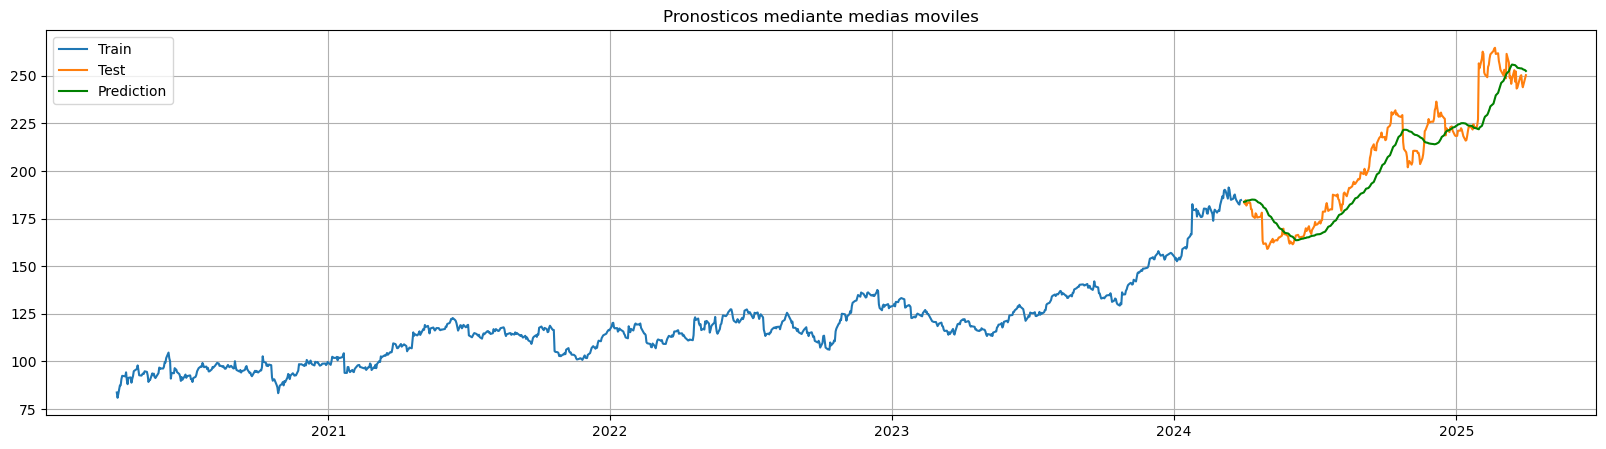

In [20]:
y_pred_m = pd.DataFrame(y_pred_m['pronostico'][1004:])

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_pred_m['pronostico'], label='Prediction', color='green')
plt.legend(loc='best')
plt.title("Pronosticos mediante medias moviles")
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error
rmse  = np.sqrt(mean_squared_error(test, y_pred_m)).round(2)
mape = np.round(np.mean(np.abs((test['IBM'] - y_pred_m['pronostico']) / test['IBM'])) * 100, 2)

print('RMSE = ', rmse, 'MAPE = ', mape)

RMSE =  12.07 MAPE =  4.61


In [22]:
# Pronostico para el dia siguiente
y_pred.tail(1)['pronostico']

Date
2025-04-01    252.119333
Name: pronostico, dtype: float64

# Predicciones Walmart

In [24]:
walmart = yf.download(tickers = 'WMT', period = '5y', interval = '1d', rounding = True)
walmart = walmart['Close']
walmart.head()

[*********************100%***********************]  1 of 1 completed


Ticker,WMT
Date,
2020-04-02,36.75
2020-04-03,37.01
2020-04-06,39.05
2020-04-07,37.79
2020-04-08,37.74


In [25]:
# Calculo de indice de autocorrelation 
walmart_series = walmart.squeeze()  # Convierte un DataFrame con una sola columna en una Serie

# Calcular la autocorrelación
autocorrelacion = walmart_series.autocorr()
autocorrelacion

0.9988103773418525

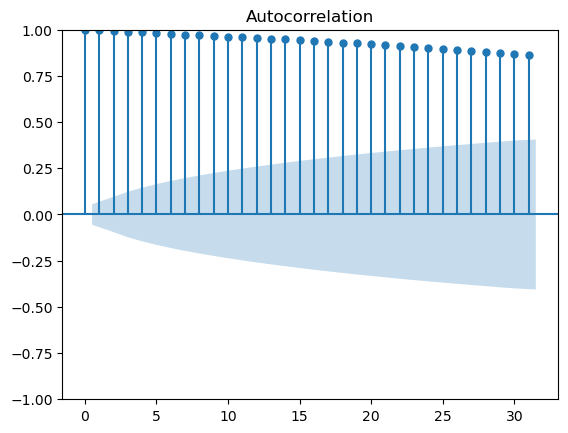

In [26]:
# Generaicon de la funcion de autocorrelacion
acf_array = acf(walmart)
plot_acf(walmart, alpha = 0.05)
plt.show() # si hay correlacion porque el area azul no sale de los puntos azules

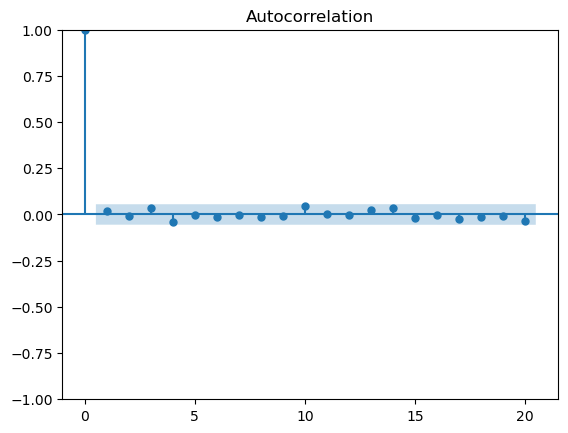

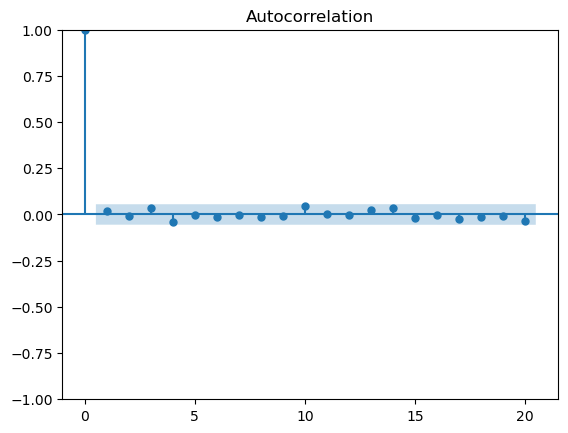

In [27]:
rendimientos = walmart.pct_change()
rendimientos = rendimientos.dropna()
acf_rend = acf(rendimientos)
plot_acf(rendimientos, alpha = 0.05 ,lags = 20)

In [28]:
# Prueba Dickey-Fuller para los precios de WALMART
resultado = adfuller(walmart)
print('El valor p de la prueba es: ' + str(resultado[1]))

El valor p de la prueba es: 0.995347340919066


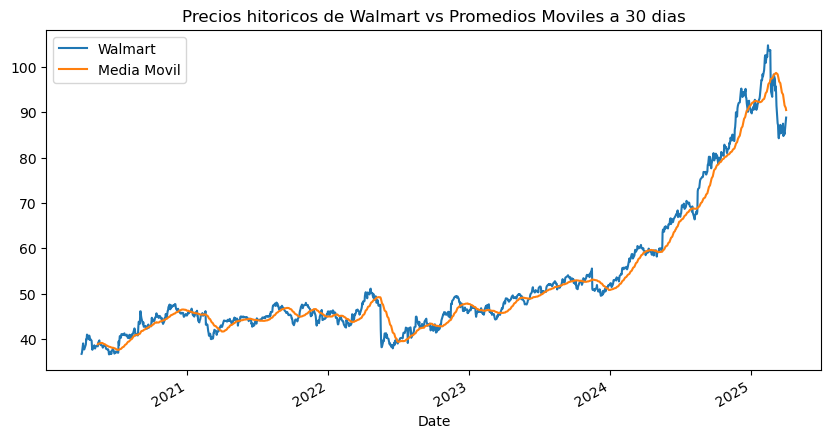

In [29]:
# Graficacion de la media movil para WALMART
rolling_walmart = walmart.rolling(30).mean()

fig, ax = plt.subplots(figsize=(10, 5))
walmart.plot(ax=ax, label="Walmart")
rolling_walmart.plot(ax=ax, label="Media Móvil")
plt.title("Precios hitoricos de Walmart vs Promedios Moviles a 30 dias")
plt.legend(['Walmart', 'Media Movil'])
plt.show()

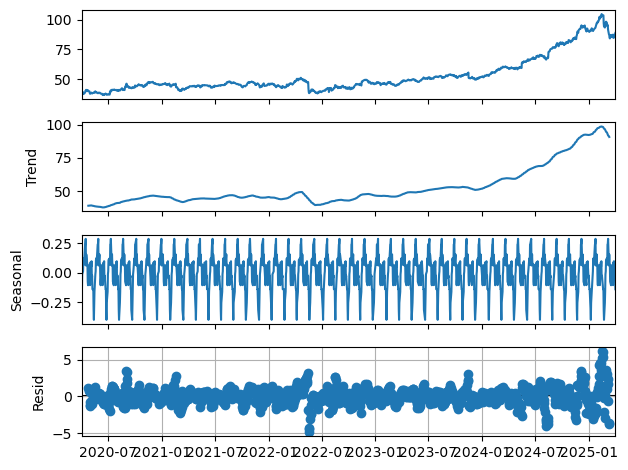

In [30]:
decomposed_walmart = sm.tsa.seasonal_decompose(walmart, period = 30)
figure = decomposed_walmart.plot()
plt.grid()
plt.show()

In [31]:
# Prediccion simple mediante promedios moviles
walmart.shape

(1256, 1)

In [32]:
len_train = int(1256 * 0.8)
len_train

1004

In [33]:
# Definition de grupos de entrenamiento y prueba
train = walmart[0:len_train]
test = walmart[len_train:]

y_pred = walmart.copy()
y_pred = pd.DataFrame(y_pred)
y_pred['pronostico'] = walmart.rolling(30).mean()
y_pred[0:35]

Ticker,WMT,pronostico
Date,,
2020-04-02,36.75,NaN
2020-04-03,37.01,NaN
2020-04-06,39.05,NaN
2020-04-07,37.79,NaN
2020-04-08,37.74,NaN
2020-04-09,37.73,NaN
2020-04-13,38.81,NaN
2020-04-14,39.96,NaN
2020-04-15,39.89,NaN


In [34]:
y_pred_m = y_pred.copy()
y_pred_m['pronostico'][29] = 'NaN'
for contador in range(30, 1256):
    y_pred_m['pronostico'][contador] = y_pred['pronostico'][contador-1]
y_pred_m[0:35]

Ticker,WMT,pronostico
Date,,
2020-04-02,36.75,NaN
2020-04-03,37.01,NaN
2020-04-06,39.05,NaN
2020-04-07,37.79,NaN
2020-04-08,37.74,NaN
2020-04-09,37.73,NaN
2020-04-13,38.81,NaN
2020-04-14,39.96,NaN
2020-04-15,39.89,NaN


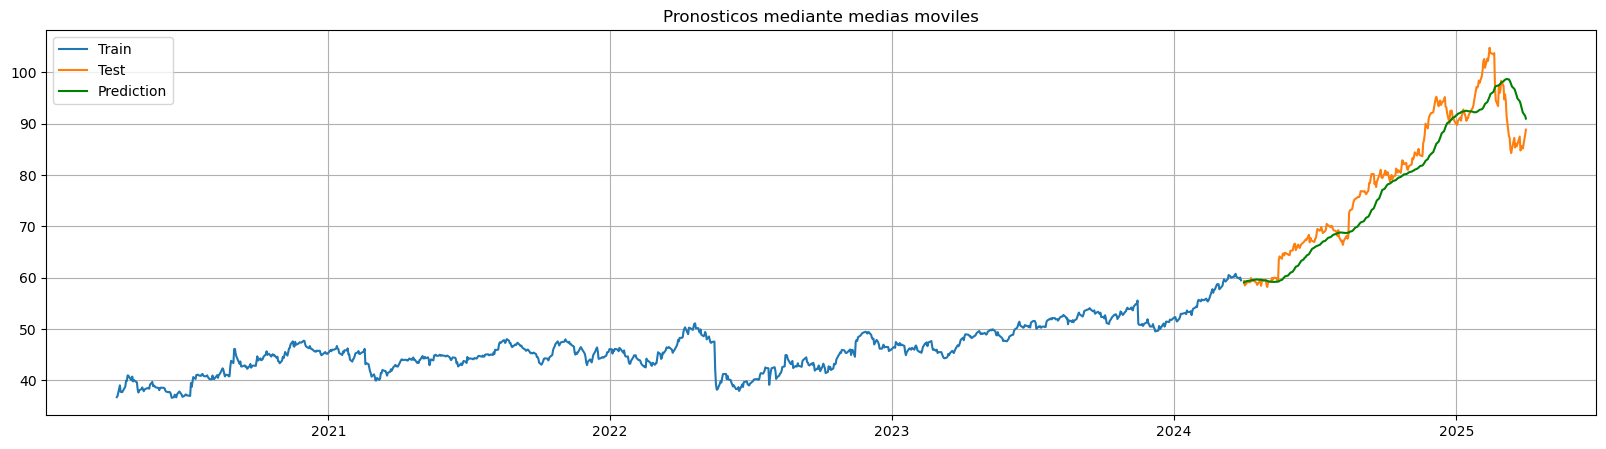

In [35]:
y_pred_m = pd.DataFrame(y_pred_m['pronostico'][1004:])

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_pred_m['pronostico'], label='Prediction', color='green')
plt.legend(loc='best')
plt.title("Pronosticos mediante medias moviles")
plt.show()

In [36]:
rmse  = np.sqrt(mean_squared_error(test, y_pred_m)).round(2)
mape = np.round(np.mean(np.abs((test['WMT'] - y_pred_m['pronostico']) / test['WMT'])) * 100, 2)

print('RMSE = ', rmse, 'MAPE = ', mape)

RMSE =  4.53 MAPE =  4.26


In [37]:
# Pronostico para el dia siguiente
y_pred.tail(1)['pronostico']

Date
2025-04-01    90.487667
Name: pronostico, dtype: float64